In [1]:
%matplotlib notebook
import numpy as np
import scipy.stats as stats
from keras.utils import to_categorical
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Using TensorFlow backend.


In [2]:
correct_output = np.load("bayesian2_true_output_50_0.5.npy")
mc_output = np.load("bayesian2_mc_output_50_0.5.npy")
mc_output_mean = np.mean(mc_output, axis=1)
correct_output_cat = to_categorical(correct_output)

In [3]:
print(mc_output.shape)

print(mc_output_mean.shape)
print(correct_output_cat.shape)

(2000, 50, 4)
(2000, 4)
(2000, 4)


Calculate uncertainties $ U_{\sigma} $ and $ U_{H} $ for true and false matches

In [4]:
u_s = []
u_h = []

for o, c in zip(mc_output, correct_output_cat):
    o_m = o.mean(axis=0)
    
    u_s.append(o.var(axis=0).mean())
    u_h.append(stats.entropy(o).mean())

u_s_np = np.array(u_s)
u_h_np = np.array(u_h)

print("U_s:", u_s_np.mean())
print("U_h:", u_h_np.mean())

U_s: 0.0045514186
U_h: 3.3387177


In [5]:
# calculate correlation
eps = 1e-16
kld = []

for mc, c in zip(mc_output_mean, correct_output_cat):
    #kld.append(stats.entropy(pk=mc.clip(eps, 1-eps), qk=c.clip(eps, 1-eps)))
    kld.append(stats.wasserstein_distance(mc, c))
    
kld_np = np.array(kld)

<IPython.core.display.Javascript object>


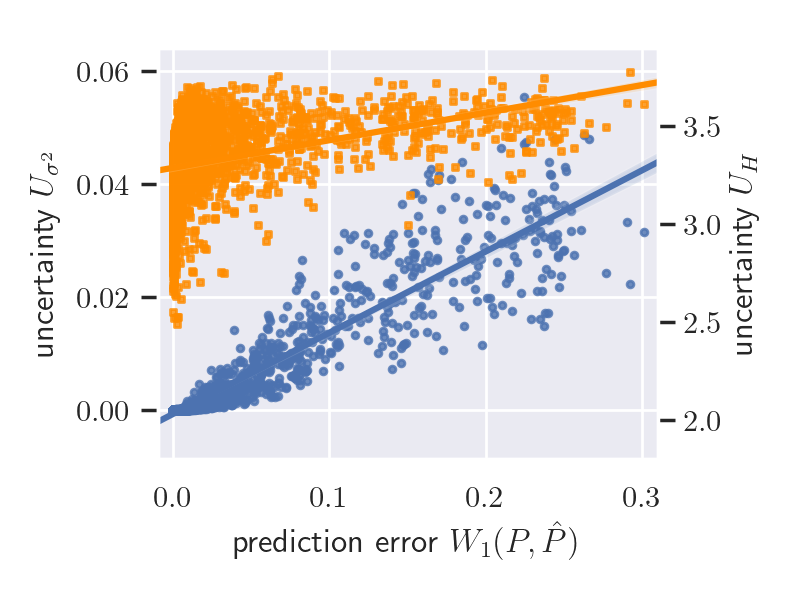

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))
ax2 = ax1.twinx()

stride = 1

ax1.set_xlabel(r"prediction error $ W_{1} ( P , \hat{P} ) $")
ax1.set_ylabel(r"uncertainty $ U_{\sigma^{2}} $")
#sns.scatterplot(kld_np[::stride], u_s_np[::stride], ax=ax1, s=8)
sns.regplot(x=kld_np[::stride], y=u_s_np[::stride], ax=ax1, scatter_kws={'s':6})

ax2.set_ylabel(r"uncertainty $ U_{H} $")
#sns.scatterplot(kld_np[::stride], u_h_np[::stride], ax=ax2, color='darkorange', s=8)
sns.regplot(x=kld_np[::stride], y=u_h_np[::stride], ax=ax2, color='darkorange', marker='s', scatter_kws={'s':4})
ax2.grid(False, axis='y')

ylim = ax2.get_ylim()
ax2.set_ylim([1.8, 3.9])

xlim = ax1.get_xlim()
ax1.set_xlim([-0.01, 0.31])

plt.tight_layout()
plt.show()
plt.savefig("replots.pdf", dpi=300, bbox_inches='tight')

In [16]:
# calculate correlation coefficient

print(stats.spearmanr(kld_np, u_s_np))
print(stats.spearmanr(kld_np, u_h_np))

SpearmanrResult(correlation=0.9864989691247421, pvalue=0.0)
SpearmanrResult(correlation=0.5991796854943061, pvalue=3.2642680668417057e-195)


In [36]:
# show errors and uncertainty for opener image
mc_output_0 = mc_output[:,0]
